In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn import svm
from statistics import mean
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score

In [23]:
df = pd.read_csv('Titanic dataset.csv')

In [24]:
df.nunique()

pclass         3
survived       2
name        1307
sex            2
age           98
sibsp          7
parch          8
ticket       929
fare         281
cabin        186
embarked       3
dtype: int64

In [25]:
df['sex'] = df['sex'].replace(["female", "male"], [0, 1])
df['embarked'] = df['embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])

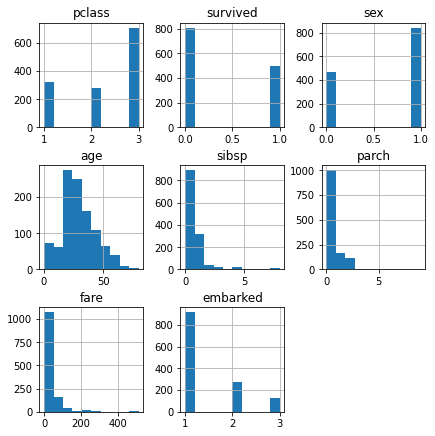

In [26]:
df.hist(figsize=(6,6))
plt.tight_layout(pad=0.5)
plt.show()

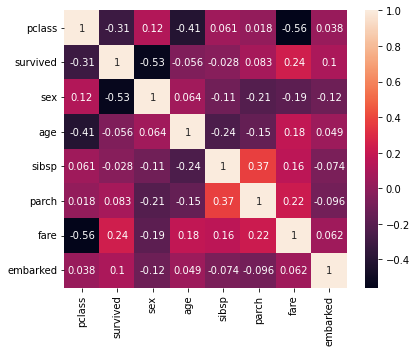

In [27]:
corr = df.corr()           
plt.figure(figsize=(6,5))
sns.heatmap(corr,annot=True)
plt.tight_layout()
plt.show()

In [28]:
df.drop(['pclass','cabin','name','ticket'],axis=1,inplace=True)
df.head(5)

,survived,sex,age,sibsp,parch,fare,embarked
0,1,0,29.0000,0,0,211.3375,1.0
1,1,1,0.9167,1,2,151.5500,1.0
2,0,0,2.0000,1,2,151.5500,1.0
3,0,1,30.0000,1,2,151.5500,1.0
4,0,0,25.0000,1,2,151.5500,1.0


In [29]:
imp = SimpleImputer(missing_values=np.nan,strategy='mean')
df2 = df.copy()
df2 = imp.fit_transform(df2)
df2 = pd.DataFrame(df2,columns=df.columns)

df2.head()

,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,0.0,29.0000,0.0,0.0,211.3375,1.0
1,1.0,1.0,0.9167,1.0,2.0,151.5500,1.0
2,0.0,0.0,2.0000,1.0,2.0,151.5500,1.0
3,0.0,1.0,30.0000,1.0,2.0,151.5500,1.0
4,0.0,0.0,25.0000,1.0,2.0,151.5500,1.0


In [30]:
df2.isnull().sum()

survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [31]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [32]:
outlier_cols = ["fare"] 
for col in outlier_cols:
  l,u = outlier_treatment(df2[col])
  df3 = df2[ (df2[col] > u) | (df2[col] < l) ]
  df2.drop(df3.index , inplace=True)

df2.shape

(1138, 7)

In [33]:
X_feature = df2.loc[:, df2.columns != 'survived']
Y_target = df2.loc[:, df2.columns == 'survived']

print(X_feature.shape)
print(Y_target.shape)

(1138, 6)
(1138, 1)


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_feature, Y_target, test_size = 0.2,random_state=12)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(910, 6)
(228, 6)
(910, 1)
(228, 1)


In [35]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB() 

In [36]:
Train_pred = classifier.fit(X_train, Y_train.values.ravel())
Train_pred

GaussianNB(priors=None, var_smoothing=1e-09)

In [37]:
Test_pred = classifier.fit(X_test, Y_test.values.ravel())
Test_pred

GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
prediction_train_gauss = round(Train_pred.score(X_train, Y_train) * 100, 2)

print("Accuracy Score after Gaussian Naive Bayes (Training subset) : ",prediction_train_gauss)

prediction_test_gauss = round(Test_pred.score(X_test, Y_test) * 100, 2)

print("Accuracy Score after Gaussian Naive Bayes (Testing subset) : ",prediction_test_gauss)

Accuracy Score after Gaussian Naive Bayes (Training subset) :  76.92
Accuracy Score after Gaussian Naive Bayes (Testing subset) :  76.75


In [39]:
print('Probability of each class')  
print('Survive = 0: %.2f' % classifier.class_prior_[0])
print('Survive = 1: %.2f' % classifier.class_prior_[1])

Probability of each class
Survive = 0: 0.62
Survive = 1: 0.38


In [40]:
y_pred = classifier.predict(X_test)
cf_matrix = confusion_matrix(Y_test, y_pred)
cf_matrix

array([[118,  23],
       [ 30,  57]])

In [41]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

ps = precision_score(Y_test, y_pred)
print("Precision Score : ",ps)

rs = recall_score(Y_test, y_pred)
print("Recall Score : ",rs)

fs = f1_score(Y_test, y_pred)
print("F1 Score ",fs)

Precision Score :  0.7125
Recall Score :  0.6551724137931034
F1 Score  0.6826347305389221
